<a href="https://colab.research.google.com/github/Ashitha-K/Assignment/blob/main/ashitha_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
data=pd.read_csv('/content/Wine_clust  (1).csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.shape

(178, 13)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Standardization
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(data)
wine_data_scaled = pd.DataFrame(wine_data_scaled, columns=data.columns)
wine_data_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


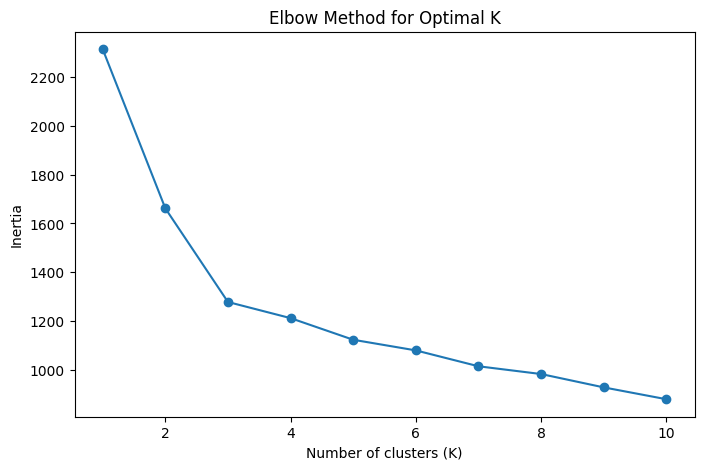

In [6]:
#Choose the number of clusters (K) using the elbow method
wcss = []
K = range(1, 11)

for i  in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init='auto', random_state=42)
    kmeans.fit(wine_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [7]:
#Apply K-means with K=3
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=42,n_init='auto')
y_predict= kmeans.fit_predict(wine_data_scaled)
y_predict



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

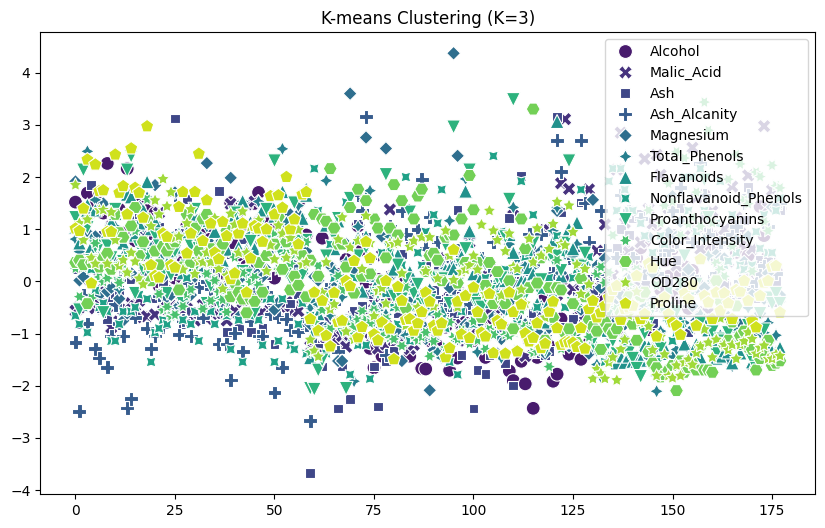

In [65]:

plt.figure(figsize=(10, 6))
sns.scatterplot(wine_data_scaled, palette='viridis', s=100)
plt.title('K-means Clustering (K=3)')
plt.show()


<ipython-input-66-401e8a5b4573>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=wine_data_scaled, x='Alcohol', y='Total_Phenols', palette='viridis', s=100)


Text(0.5, 1.0, 'K-means Clustering (K=3)')

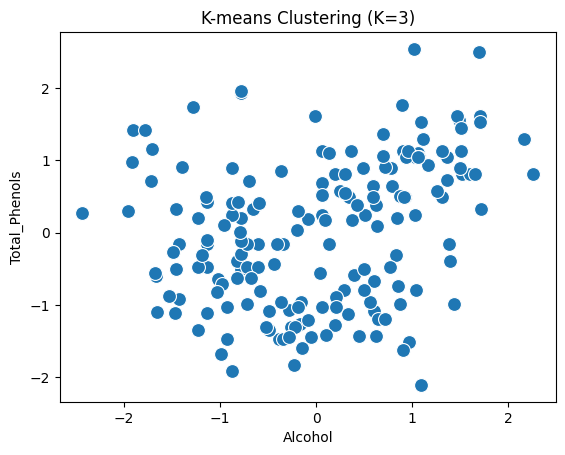

In [66]:
# Plotting the clusters with respect to two features (Alcohol vs Total phenols)
sns.scatterplot(data=wine_data_scaled, x='Alcohol', y='Total_Phenols', palette='viridis', s=100)
plt.title('K-means Clustering (K=3)')

**Agglomerative Clustering**

In [59]:
#importing agglomerative cluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster


In [60]:
mergings=linkage(wine_data_scaled ,method='ward')

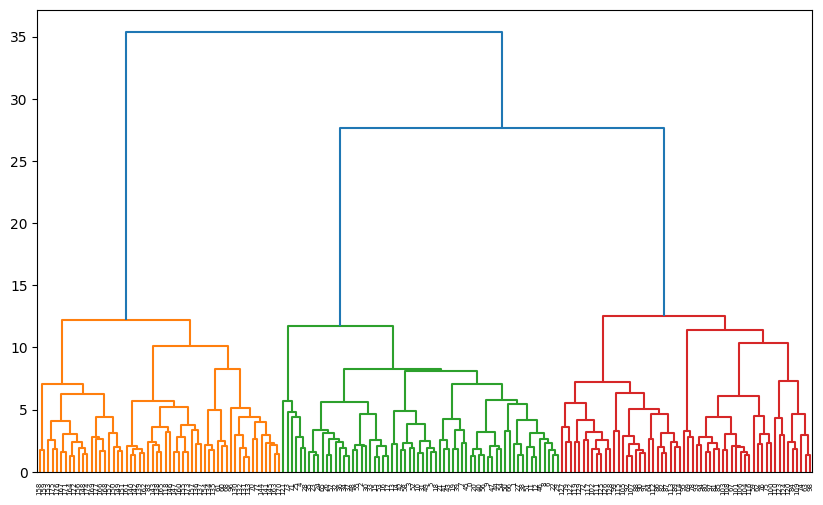

In [61]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [62]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(wine_data_scaled)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

**Calculating silhoutte score for kmean and agglomerative**

In [63]:
from sklearn.metrics import silhouette_score
#Agglomerative silhoutte score
silhoutte_avg=silhouette_score(wine_data_scaled,y_hc)
print('agglomerative:',silhoutte_avg)

agglomerative: 0.2774439826952265


In [64]:
#Kmeans silhoutte score
silhoutte_km=silhouette_score(wine_data_scaled,y_predict)
print('kmeans:',silhoutte_km)

kmeans: 0.2848589191898987


**DB scan**

In [22]:
#importing db scan
from sklearn.cluster import DBSCAN


In [17]:
sns.scatterplot(data=wine_data_scaled,c=clusters,palette='viridis', s=100)

Text(0.5, 1.0, 'DB Scan Clustering')

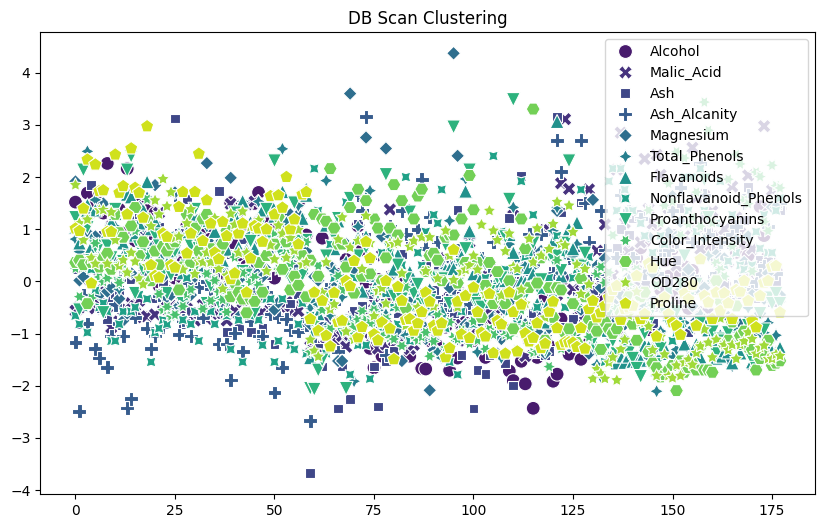

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(wine_data_scaled, palette='viridis', s=100)
plt.title('DB Scan Clustering')

In [73]:
#Applying DB scan
db=DBSCAN(eps=2,min_samples=4) # setting eps as 2 and min_samples as 4
clusters=db.fit_predict(wine_data_scaled)
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  1,  1,  2,  2,
       -1, -1,  2,  3,  3, -1,  3,  2, -1,  1, -1,  4,  4,  5,  5,  5, -1,
        4,  2,  4,  4, -1, -1, -1,  4,  3,  3,  1,  4,  2,  4,  4,  4, -1,
        1,  4,  4,  4,  4,  5, -1, -1])

In [49]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  1,  1,  2,  2,
       -1, -1,  2,  3,  3, -1,  3,  2, -1,  1, -1,  4,  4,  5,  5,  5, -1,
        4,  2,  4,  4, -1, -1, -1,  4,  3,  3,  1,  4,  2,  4,  4,  4, -1,
        1,  4,  4,  4,  4,  5, -1, -1])